# Help Code

In [16]:
import numpy as np
from scipy.special import comb
import matplotlib.pyplot as plt

def Entropy(probs):
  entropy = 0
  for i in range(len(probs)):
      if probs[i] != 0:
          entropy -= probs[i] * np.log2(probs[i])
  return round(entropy,3)

def KL_distance(Pprobs,Qprobs):
  distance = 0
  if 0 in Qprobs:
      return float('inf')
  for i in range(len(Pprobs)):
      if Pprobs[i] != 0:
          distance += Pprobs[i] * np.log2(Pprobs[i] / Qprobs[i])
  return round(distance,3)
  
def Entropy_rate(probs, stationary_dist):
    rate = 0
    for i in range(len(probs)):
        for j in range(len(probs[i])):
            if probs[i] != 0:
                rate -= stationary_dist[i] * probs[i][j] * np.log2(probs[i][j])
                # print(stationary_dist[i],probs[i][j] * np.log2(probs[i][j]))
    return round(rate,3)

# Άσκηση 1



In [63]:
stationary_dist = [90/211,100/211,21/211]
print("Entropy = ",Entropy(stationary_dist))
probs = [[7/10,2/10,1/10],[4/20,15/20,1/20],[1/3,1/3,1/3]]
print("Entropy rate = ",Entropy_rate(probs, stationary_dist))

Entropy =  1.366
Entropy rate =  1.121


# Άσκηση 2






[0.2  0.75 0.05]
[0.30666667 0.61916667 0.07416667]
[0.36322222 0.55043056 0.08634722]
[0.39312407 0.51424977 0.09262616]
[0.40891219 0.49518753 0.09590028]
[0.4172428  0.48513984 0.09761736]
[0.42163705 0.47984256 0.09852039]
[0.42395458 0.47704946 0.09899596]
[0.42517675 0.47557667 0.09924659]
[0.42582125 0.47480004 0.0993787 ]
11 11


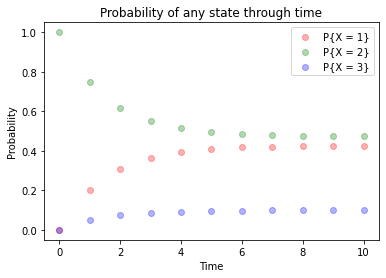

In [68]:
state = np.array([0,1,0])
probs = np.array([[7/10,2/10,1/10],[4/20,15/20,1/20],[1/3,1/3,1/3]])
x, y, z = [0], [1], [0]
for i in range(10):
    state = np.dot(state,probs)
    print(state)
    x.append(state[0])
    y.append(state[1])
    z.append(state[2])
time = np.linspace(0,10,11)
print(len(x),len(time))
plt.scatter(time,x,c = 'r',alpha = .3,label = 'P{X = 1}')
plt.scatter(time,y,c = 'g',alpha = .3,label = 'P{X = 2}')
plt.scatter(time,z,c = 'b',alpha = .3,label = 'P{X = 3}')
plt.title('Probability of any state through time')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()

0.992
1.23
1.31
1.341
1.354
1.36
1.363
1.365
1.365
1.366


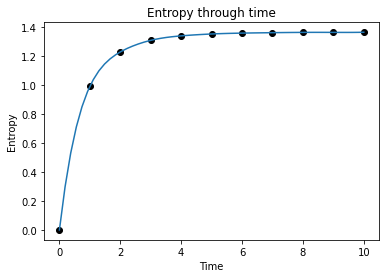

In [71]:
from scipy.interpolate import make_interp_spline, BSpline

Entropy_time = [Entropy([0,1,0])]
for i in range(1,11):
    Entropy_time.append(Entropy([x[i],y[i],z[i]]))
    print(Entropy([x[i],y[i],z[i]]))
    # print([x[i]* 211,y[i] * 211,z[i] * 211])
xnew = np.linspace(0, 11 - 1, 5 * 11)
spl = make_interp_spline(time, Entropy_time, k=5)
Entropy_time_smooth = spl(xnew)

plt.plot(xnew, Entropy_time_smooth, label='Spline')

plt.scatter(time,Entropy_time,c = 'black')
plt.title("Entropy through time")
plt.xlabel('Time')
plt.ylabel('Entropy')
plt.show()

In [81]:
# from scipy.interpolate import make_interp_spline, BSpline

# rate = [Entropy([0,1,0])]
# for i in range(1,11):
#     rate.append( i / (i + 1) * Entropy([x[i],y[i],z[i]]) * rate[i-1])

# print(len(rate))
# xnew = np.linspace(0, 11 - 1, 5 * 11)
# spl = make_interp_spline(time, rate, k=5)
# rate_smooth = spl(xnew)|

# plt.plot(xnew, rate_smooth, label='Spline')

# plt.scatter(time,rate,c = 'black')
# plt.title("Entropy rate through time")
# plt.xlabel('Time')
# plt.ylabel('Entropy rate')
# plt.show()